# FederatedPi
This is a project where we aim to apply a federated learning technique to a Multi-Layer Perceptron (MLP) model.

# Data Generation
    

In [64]:
#This file will generate data for training
#Temperature values range from 20C to 43C (highest recorded fever) in humans, 36.5 to 37.5 being the o.k. range
#Resting heart rate values range in humans range from 60 (low for an old person) and 190 (high for a newborn)

    #newborn : 140 ± 50
    #1–2 ans : 110 ± 40
    #3–5 ans : 105 ± 35
    #6–12 ans : 95 ± 30
    #adolescent ou adulte : 70 ± 10
    #personne âgée : 65 ± 5

#We will generate values based on the age of subjects and a gaussian normal distribution
#from faker import Faker
#from faker.providers import BaseProvider
import random
import csv
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook

def get_age():
    #return  random.randrange(0, 100)
    return random.uniform(0,100)
def get_Temp():
    mu= 37
    sigma= 0.5

    return round(random.gauss(mu,sigma), 1)

def get_HR(age):

    if age<1:
        mu= 140
        sigma= 50
    elif age<3:
        mu= 110
        sigma= 40
    elif age<5:
        mu= 105
        sigma= 35
    elif age<12:
        mu= 95
        sigma= 30
    elif age<65:
        mu= 70
        sigma= 10
    else:
        mu= 65
        sigma= 5

    return round(random.gauss(mu,sigma), 1)

# def get_Label(age, temp, hr):
#     label=0
#     if ( 0<=age<1 and 90<=hr<=190 and 36.5<temp<37.5 ):
#         label=1
#         return label

#     if ( 1<=age<3 and 70<=hr<=150 and 36.5<temp<37.5 ):
#         label=1
#         return label

#     if ( 3<=age<6 and 70<=hr<=140 and 36.5<temp<37.5 ):
#         label=1
#         return label

#     if ( 0<=age<12 and 65<=hr<=125 and 36.5<temp<37.5 ):
#         label=1
#         return label

#     if ( 12<=age<65 and 60<=hr<=90 and 36.5<temp<37.5 ):
#         label=1
#         return label

#     if ( age>=65 and 60<=hr<=70 and 36.5<temp<37.5 ):
#         label=1
#         return label

#     return label
def get_Label(age, temp, hr): # increases with age & hr & temp
#   label = round((hr/190)*(age/100)*90)
    if (age/100)>0.5 and (hr/190)<0.5 and temp>36.5 and temp<37.5:
        label=1
        return label
    label=0
    return label


def generate_DATA():
    a=get_age();
    b=get_Temp();
    c=get_HR(a);
    d=get_Label(a,b,c);
    return [a,b,c,d]
    #return [a,b,c,d]
    
def min_max_scaling(df):
    # copy the dataframe
    df_norm = df.copy()
    # apply min-max scaling
    for column in df_norm.columns:
        df_norm[column] = (df_norm[column] - df_norm[column].min()) / (df_norm[column].max() - df_norm[column].min())
        
    return df_norm

with open('Data_Train.csv', 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Age', 'Temperature', 'HeartBPM', 'Label'])
    for n in range(1, 200):
        writer.writerow(generate_DATA())

with open('Data_Test.csv', 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Age', 'Temperature', 'HeartBPM', 'Label'])
    for n in range(1, 100):
        writer.writerow(generate_DATA())
        
#Data_Train = min_max_scaling(pd.read_csv('Data_Train.csv',dtype=np.float64))
#Data_Test = min_max_scaling(pd.read_csv('Data_Test.csv',dtype=np.float64))
Data_Train = pd.read_csv('Data_Train.csv')
Data_Test = pd.read_csv('Data_Test.csv')

print(Data_Train) #original Data
print(Data_Test) #original Data

Data_Train1 = Data_Train.iloc[:99,:]
Data_Test1 = Data_Test.iloc[:49,:]

print(Data_Train1.shape)
print(Data_Test1.shape)


Data_Train2 = Data_Train.iloc[100:,:]
Data_Test2 = Data_Test.iloc[50:,:]

print(Data_Train2.shape)
print(Data_Test2.shape)


           Age  Temperature  HeartBPM  Label
0    80.924976         37.6      63.6      0
1    17.073621         36.6      76.7      0
2    11.790448         37.7      75.3      0
3     1.899680         36.8     142.5      0
4    24.290957         36.9      66.0      0
..         ...          ...       ...    ...
194  76.008444         36.4      66.6      0
195  74.791102         37.0      63.7      1
196  80.334438         37.5      57.1      0
197  97.699400         36.7      62.3      1
198  70.497650         36.9      68.8      1

[199 rows x 4 columns]
          Age  Temperature  HeartBPM  Label
0   62.783518         37.4      70.9      1
1   12.250184         37.9      67.0      0
2   37.700597         36.2      60.3      0
3   45.897235         35.6      55.7      0
4   14.332642         37.4      66.6      0
..        ...          ...       ...    ...
94  50.618464         37.2      74.6      1
95  88.228388         36.7      64.1      1
96  64.311015         37.9      62.5    

##Data Visualisation

In [65]:
import seaborn as sns

<AxesSubplot:xlabel='Age', ylabel='Temperature'>

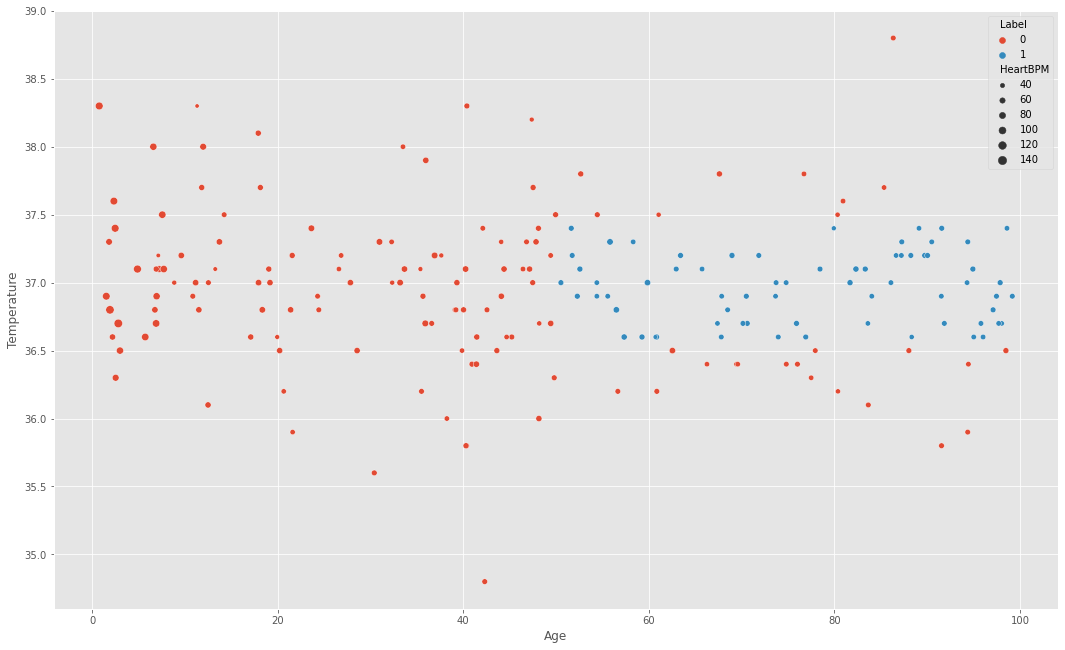

In [66]:
plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (18,11)
sns.scatterplot(y = Data_Train.Temperature, x=Data_Train.Age,
               size = Data_Train.HeartBPM, hue= Data_Train.Label,
               )

<AxesSubplot:xlabel='Age', ylabel='HeartBPM'>

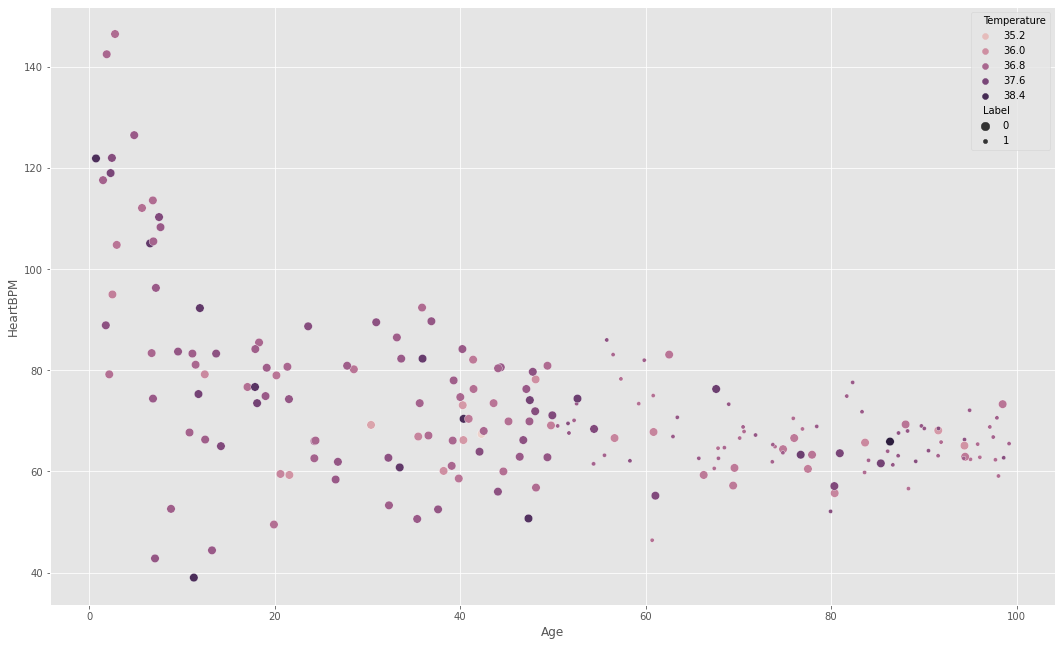

In [67]:
#Data_Train.plot(kind='scatter',x='Temperature',y='Age', color ='red', size = 'HeartBPM')
sns.scatterplot(x = Data_Train.Age, y=Data_Train.HeartBPM,
               size = Data_Train.Label, hue = Data_Train.Temperature)

In [68]:
Data_Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          199 non-null    float64
 1   Temperature  199 non-null    float64
 2   HeartBPM     199 non-null    float64
 3   Label        199 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 6.3 KB


In [69]:
Data_Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          99 non-null     float64
 1   Temperature  99 non-null     float64
 2   HeartBPM     99 non-null     float64
 3   Label        99 non-null     int64  
dtypes: float64(3), int64(1)
memory usage: 3.2 KB


In [70]:
Data_Train.head(10)

,Age,Temperature,HeartBPM,Label
0,80.924976,37.6,63.6,0
1,17.073621,36.6,76.7,0
2,11.790448,37.7,75.3,0
3,1.899680,36.8,142.5,0
4,24.290957,36.9,66.0,0
5,97.097583,36.8,68.8,1
6,24.411077,36.8,66.1,0
7,44.379896,37.1,80.6,0
8,40.346319,35.8,66.2,0
9,35.945554,37.9,82.3,0


In [71]:
Data_Test.head(10)

,Age,Temperature,HeartBPM,Label
0,62.783518,37.4,70.9,1
1,12.250184,37.9,67.0,0
2,37.700597,36.2,60.3,0
3,45.897235,35.6,55.7,0
4,14.332642,37.4,66.6,0
5,47.549374,37.0,84.5,0
6,0.633289,36.7,139.9,0
7,7.295060,37.2,65.7,0
8,50.048948,37.8,83.0,0
9,49.415716,38.3,54.6,0


In [72]:
# train_dataset = np.loadtxt(open("Data.csv", "rb"), delimiter=",", skiprows=1)

In [73]:
Data_Train.describe()

,Age,Temperature,HeartBPM,Label
count,199.000000,199.000000,199.000000,199.000000
mean,49.857304,36.947236,72.381407,0.336683
std,29.294716,0.528940,16.298562,0.473767
min,0.742533,34.800000,39.000000,0.000000
25%,24.351017,36.600000,62.800000,0.000000
50%,48.088334,37.000000,68.400000,0.000000
75%,75.356988,37.200000,78.250000,1.000000
max,99.171067,38.800000,146.500000,1.000000


In [74]:
Data_Test.describe()

,Age,Temperature,HeartBPM,Label
count,99.000000,99.000000,99.000000,99.000000
mean,50.420668,36.904040,72.929293,0.323232
std,28.769686,0.527203,25.193315,0.470091
min,0.633289,35.600000,47.900000,0.000000
25%,24.862031,36.500000,60.750000,0.000000
50%,50.618464,36.900000,65.700000,0.000000
75%,75.608853,37.300000,74.200000,1.000000
max,99.529639,38.300000,196.400000,1.000000


In [75]:
sum(Data_Test.duplicated())
sum(Data_Train.duplicated())

0

## This dataset contains no : missing data, qualitative values, normalized values


# Data Pre-Processing

In [76]:
import torch
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler

# number of subprocesses to use for data loading
num_workers = 0

# percentage of training set to use as validation
valid_size = 0.2


In [77]:

# obtain training indices that will be used for validation
num_train = len(Data_Train)
indices = list(range(num_train))
np.random.shuffle(indices)
split = int(np.floor(valid_size * num_train))
train_idx, valid_idx = indices[split:], indices[:split]


In [78]:
Data_Train

,Age,Temperature,HeartBPM,Label
0,80.924976,37.6,63.6,0
1,17.073621,36.6,76.7,0
2,11.790448,37.7,75.3,0
3,1.899680,36.8,142.5,0
4,24.290957,36.9,66.0,0
...,...,...,...,...
194,76.008444,36.4,66.6,0
195,74.791102,37.0,63.7,1
196,80.334438,37.5,57.1,0
197,97.699400,36.7,62.3,1


In [79]:
# define samplers for obtaining training and validation batches
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

targets_df = pd.DataFrame(data=Data_Train["Label"])
targets_df.columns = ["Label"]


del Data_Train["Label"]

train = torch.utils.data.TensorDataset(torch.Tensor(np.array(Data_Train)), torch.tensor(targets_df['Label'].values))

train_loader = torch.utils.data.DataLoader(train,sampler=train_sampler, num_workers=num_workers)

valid_loader = torch.utils.data.DataLoader(train,sampler=valid_sampler, num_workers=num_workers)

test_targets_df = pd.DataFrame(data=Data_Test["Label"])
test_targets_df.columns = ["Label"]

del Data_Test["Label"]

test = torch.utils.data.TensorDataset(torch.Tensor(np.array(Data_Test)), torch.tensor(test_targets_df['Label'].values))

test_loader = torch.utils.data.DataLoader(test,num_workers=num_workers)

In [80]:
train_loader

In [81]:
test_loader

# Building Classic Model

In [82]:
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch import nn
class Network(nn.Module):

    def __init__(self):
        super().__init__()

        # Inputs to hidden layer linear transformation
        #self.drop1 = nn.Dropout(p=0.8)
        self.input = nn.Linear(3, 5)
        #self.drop2 = nn.Dropout(p=0.5)
        self.hidden1 = nn.Linear(5, 5)
        self.hidden2 = nn.Linear(5, 4)
#         self.hidden3 = nn.Linear(5, 5)
#         self.hidden4 = nn.Linear(5, 5)
        self.hidden5 = nn.Linear(4, 2)
        
        self.output = nn.Linear(2, 2)
        # Define sigmoid activation and softmax output
        self.ReLU = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        # Pass the input tensor through each of our operations
        #x = self.drop1(x)
        x = self.input(x)
        #x = self.drop2(x)
        x = self.hidden1(x)
        x = self.hidden2(x)
#         x = self.hidden3(x)
#         x = self.hidden4(x)
        x = self.hidden5(x)

        x = self.ReLU(x)
        x = self.output(x)
        
        x = self.softmax(x)

        return x

model = Network()


In [83]:
model1 = model
model2 = model
modelFed = model

models = [model1,model2]

# Training Model

Loss function is categorical cross-entropy
Optimisation is done by ADAM

In [84]:
# specify loss function (categorical cross-entropy for classification, L1 loss for mean absolute error)

criterion = nn.CrossEntropyLoss()
#criterion = nn.L1Loss()
#criterion = nn.NLLLoss()
#c


# specify optimizer (stochastic gradient descent)
#optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
# optimizer = torch.optim.NAdam(model.parameters(), lr=0.2, betas=(0.9, 0.999), eps=1e-08, weight_decay=0, momentum_decay=0.004)
optimizer = torch.optim.Adam(model.parameters(), lr=0.005, betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=True)


In [85]:
import matplotlib.pyplot as plt

val_losses = []
train_losses = []

## https://www.kaggle.com/shubhendumishra/titanic-mlp-model-using-pytorch#Data-Exploration

In [86]:
#output = model(something)
#print(output[0]) prints specific output from model

In [87]:
#print(target[0]) prints labels

In [88]:
# number of epochs to train the model
n_epochs = 100

# initialize tracker for minimum validation loss
valid_loss_min = np.Inf # set initial "min" to infinity

for epoch in range(n_epochs):
    # monitor training loss
    train_loss = 0.0
    valid_loss = 0.0
    
    ###################
    # Train the model #
    ###################
    model.train() # prep model for training
    for data, target in train_loader:
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        output = model(data[:,0:3])#.type(torch.FloatTensor)
        # calculate the loss
        loss = criterion(output, target)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update running training loss
        train_loss += loss.item()*data.size(0)
    #################
    # Training Loss #
    #################
    #train_losses.append(loss.item())
    train_losses.append(train_loss/len(train_loader.sampler))
        
    ######################    
    # Validate the model #
    ######################
    model.eval() # prep model for evaluation
    for data, target in valid_loader:
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data[:,0:3])
        # calculate the loss
        loss = criterion(output, target)
        # update running validation loss 
        valid_loss += loss.item()*data.size(0)
    #############
    #Tensorboard#
    #############
        #val_losses.append(loss.item())
    val_losses.append(valid_loss/len(valid_loader.sampler))
        
    # print training/validation statistics 
    # calculate average loss over an epoch
    train_loss = train_loss/len(train_loader.sampler)
    valid_loss = valid_loss/len(valid_loader.sampler)
    
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
        epoch+1, 
        train_loss,
        valid_loss
        ))

    # save model if validation loss has decreased
    if valid_loss <= valid_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
        valid_loss_min,
        valid_loss))
        torch.save(model.state_dict(), 'model.pt')
        #torch.load('model.pt')
        valid_loss_min = valid_loss

Epoch: 1 	Training Loss: 0.573302 	Validation Loss: 0.469266
Validation loss decreased (inf --> 0.469266).  Saving model ...
Epoch: 2 	Training Loss: 0.506481 	Validation Loss: 0.473690
Epoch: 3 	Training Loss: 0.489176 	Validation Loss: 0.469434
Epoch: 4 	Training Loss: 0.487725 	Validation Loss: 0.478212
Epoch: 5 	Training Loss: 0.488204 	Validation Loss: 0.496398
Epoch: 6 	Training Loss: 0.483321 	Validation Loss: 0.480828
Epoch: 7 	Training Loss: 0.480526 	Validation Loss: 0.491513
Epoch: 8 	Training Loss: 0.489293 	Validation Loss: 0.529856
Epoch: 9 	Training Loss: 0.489750 	Validation Loss: 0.471268
Epoch: 10 	Training Loss: 0.470977 	Validation Loss: 0.470262
Epoch: 11 	Training Loss: 0.494465 	Validation Loss: 0.478161
Epoch: 12 	Training Loss: 0.483037 	Validation Loss: 0.488536
Epoch: 13 	Training Loss: 0.501720 	Validation Loss: 0.515938
Epoch: 14 	Training Loss: 0.489803 	Validation Loss: 0.472868
Epoch: 15 	Training Loss: 0.469858 	Validation Loss: 0.481943
Epoch: 16 	Trai

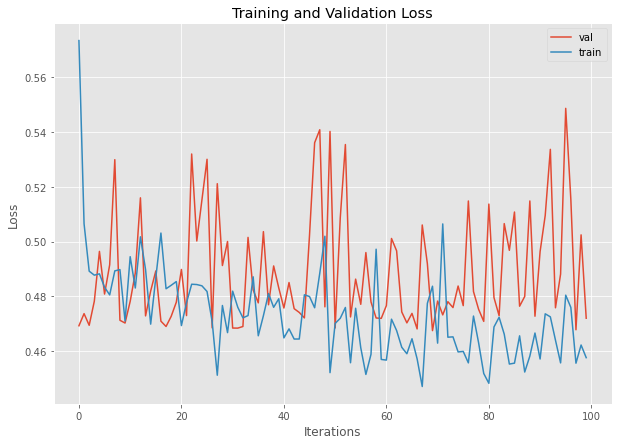

In [89]:
plt.figure(figsize=(10,7))
plt.title("Training and Validation Loss")
plt.plot(val_losses,label="val")
plt.plot(train_losses,label="train")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [90]:
model.load_state_dict(torch.load('model.pt'))

<All keys matched successfully>

In [91]:
Data_Test.head()

,Age,Temperature,HeartBPM
0,62.783518,37.4,70.9
1,12.250184,37.9,67.0
2,37.700597,36.2,60.3
3,45.897235,35.6,55.7
4,14.332642,37.4,66.6


In [92]:
test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

model.eval() # prep model for evaluation
results=[]
for data, target in test_loader:
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model(data[:,:3])
    print(data)
    # calculate the loss
    loss = criterion(output, target)
    # update test loss 
    test_loss += loss.item()*data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)
    results.append([int(data[:,0].item()), pred.item()])
    # compare predictions to true label
    correct = pred.eq(target.view_as(pred))
  
    # calculate test accuracy for each object class
    #break
    #print('Output %s Target %s Predicted %s Correct %s' % (output,target.item(),pred.item(),correct.item()))
    for i in range(len(target)):
        label = target.data
        class_correct[label] += correct.item()
        class_total[label] += 1

# calculate and print avg test loss
test_loss = test_loss/len(test_loader.sampler)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(10):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            str(i), 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

tensor([[62.7835, 37.4000, 70.9000]])
tensor([[12.2502, 37.9000, 67.0000]])
tensor([[37.7006, 36.2000, 60.3000]])
tensor([[45.8972, 35.6000, 55.7000]])
tensor([[14.3326, 37.4000, 66.6000]])
tensor([[47.5494, 37.0000, 84.5000]])
tensor([[  0.6333,  36.7000, 139.9000]])
tensor([[ 7.2951, 37.2000, 65.7000]])
tensor([[50.0489, 37.8000, 83.0000]])
tensor([[49.4157, 38.3000, 54.6000]])
tensor([[63.5079, 37.6000, 64.3000]])
tensor([[36.5478, 37.5000, 47.9000]])
tensor([[50.2259, 37.7000, 73.8000]])
tensor([[22.1980, 37.5000, 63.8000]])
tensor([[53.2400, 36.9000, 80.1000]])
tensor([[82.2123, 36.4000, 66.9000]])
tensor([[64.6253, 37.0000, 64.2000]])
tensor([[  7.6384,  36.6000, 119.1000]])
tensor([[34.9096, 36.5000, 77.4000]])
tensor([[22.6135, 36.7000, 80.9000]])
tensor([[76.5631, 37.1000, 61.2000]])
tensor([[18.5507, 36.8000, 60.8000]])
tensor([[54.8152, 36.0000, 93.1000]])
tensor([[65.0675, 36.6000, 64.3000]])
tensor([[49.3622, 37.2000, 68.2000]])
tensor([[93.9128, 36.5000, 65.8000]])
tensor

## Federated Learning 

In [108]:

#!/usr/bin/env python
# -*- coding: utf-8 -*-
# Python version: 3.6

import torch
from torch import nn
from torch.utils.data import DataLoader, Dataset


class DatasetSplit(Dataset):
    """An abstract Dataset class wrapped around Pytorch Dataset class.
    """

    def __init__(self, dataset, idxs):
        self.dataset = dataset
        self.idxs = [int(i) for i in idxs]

    def __len__(self):
        return len(self.idxs)

    def __getitem__(self, item):
        image, label = self.dataset[self.idxs[item]]
        return torch.tensor(image), torch.tensor(label)

class LocalUpdate(object):
    def __init__(self, dataset, idxs):
        self.trainloader, self.validloader, self.testloader = self.train_val_test(
            dataset, list(idxs))
        self.device = 'cuda' if args.gpu else 'cpu'
        # Default criterion set to NLL loss function
        self.criterion = nn.NLLLoss().to(self.device)

    def train_val_test(self, dataset, idxs):
        """
        Returns train, validation and test dataloaders for a given dataset
        and user indexes.
        """
        # split indexes for train, validation, and test (80, 10, 10)
        idxs_train = idxs[:int(0.8*len(idxs))]
        idxs_val = idxs[int(0.8*len(idxs)):int(0.9*len(idxs))]
        idxs_test = idxs[int(0.9*len(idxs)):]

        trainloader = DataLoader(DatasetSplit(dataset, idxs_train),
                                 batch_size=self.args.local_bs, shuffle=True)
        validloader = DataLoader(DatasetSplit(dataset, idxs_val),
                                 batch_size=int(len(idxs_val)/10), shuffle=False)
        testloader = DataLoader(DatasetSplit(dataset, idxs_test),
                                batch_size=int(len(idxs_test)/10), shuffle=False)
        return trainloader, validloader, testloader

    def update_weights(self, model, global_round):
        # Set mode to train model
        model.train()
        epoch_loss = []

        # Set optimizer for the local updates
        if self.args.optimizer == 'sgd':
            optimizer = torch.optim.SGD(model.parameters(), lr=self.args.lr,
                                        momentum=0.5)
        elif self.args.optimizer == 'adam':
            optimizer = torch.optim.Adam(model.parameters(), lr=self.args.lr,
                                         weight_decay=1e-4)

        for iter in range(self.args.local_ep):
            batch_loss = []
            for batch_idx, (images, labels) in enumerate(self.trainloader):
                images, labels = images.to(self.device), labels.to(self.device)

                model.zero_grad()
                log_probs = model(images)
                loss = self.criterion(log_probs, labels)
                loss.backward()
                optimizer.step()

                if self.args.verbose and (batch_idx % 10 == 0):
                    print('| Global Round : {} | Local Epoch : {} | [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                        global_round, iter, batch_idx * len(images),
                        len(self.trainloader.dataset),
                        100. * batch_idx / len(self.trainloader), loss.item()))
                self.logger.add_scalar('loss', loss.item())
                batch_loss.append(loss.item())
            epoch_loss.append(sum(batch_loss)/len(batch_loss))

        return model.state_dict(), sum(epoch_loss) / len(epoch_loss)

    def inference(self, model):
        """ Returns the inference accuracy and loss.
        """

        model.eval()
        loss, total, correct = 0.0, 0.0, 0.0

        for batch_idx, (images, labels) in enumerate(self.testloader):
            images, labels = images.to(self.device), labels.to(self.device)

            # Inference
            outputs = model(images)
            batch_loss = self.criterion(outputs, labels)
            loss += batch_loss.item()

            # Prediction
            _, pred_labels = torch.max(outputs, 1)
            pred_labels = pred_labels.view(-1)
            correct += torch.sum(torch.eq(pred_labels, labels)).item()
            total += len(labels)

        accuracy = correct/total
        return accuracy, loss


def test_inference(args, model, test_dataset):
    """ Returns the test accuracy and loss.
    """

    model.eval()
    loss, total, correct = 0.0, 0.0, 0.0

    device = 'cuda' if args.gpu else 'cpu'
    criterion = nn.NLLLoss().to(device)
    testloader = DataLoader(test_dataset, batch_size=128,
                            shuffle=False)

    for batch_idx, (images, labels) in enumerate(testloader):
        images, labels = images.to(device), labels.to(device)

        # Inference
        outputs = model(images)
        batch_loss = criterion(outputs, labels)
        loss += batch_loss.item()

        # Prediction
        _, pred_labels = torch.max(outputs, 1)
        pred_labels = pred_labels.view(-1)
        correct += torch.sum(torch.eq(pred_labels, labels)).item()
        total += len(labels)

    accuracy = correct/total
    return accuracy, loss

In [105]:
# number of epochs to train the model
n_epochs = 100

# initialize tracker for minimum validation loss
valid_loss_min = np.Inf # set initial "min" to infinity

for epoch in range(n_epochs):
    # monitor training loss
    train_loss = 0.0
    valid_loss = 0.0
    
    ###################
    # Train the model #
    ###################
    modelFed.train() # prep model for training
    local_weights, local_losses = [], []
    idxs_users = np.random.choice(range(2), 1, replace=False)

    for idx in idxs_users:
        local_model = LocalUpdate(dataset=Data_Train, idxs = [1,2] )#, 
        #idxs=user_groups[idx])
        
        #############
        w, loss = local_model.update_weights(
                
                
        model=copy.deepcopy(modelFed), global_round=epoch)
        local_weights.append(copy.deepcopy(w))
        local_losses.append(copy.deepcopy(loss))
            
    for data, target in train_loader:
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        output = model(data[:,0:3])#.type(torch.FloatTensor)
        # calculate the loss
        loss = criterion(output, target)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update running training loss
        train_loss += loss.item()*data.size(0)
    #################
    # Training Loss #
    #################
    #train_losses.append(loss.item())
    train_losses.append(train_loss/len(train_loader.sampler))
        
    ######################    
    # Validate the model #
    ######################
    model.eval() # prep model for evaluation
    for data, target in valid_loader:
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data[:,0:3])
        # calculate the loss
        loss = criterion(output, target)
        # update running validation loss 
        valid_loss += loss.item()*data.size(0)
    #############
    #Tensorboard#
    #############
        #val_losses.append(loss.item())
    val_losses.append(valid_loss/len(valid_loader.sampler))
        
    # print training/validation statistics 
    # calculate average loss over an epoch
    train_loss = train_loss/len(train_loader.sampler)
    valid_loss = valid_loss/len(valid_loader.sampler)
    
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
        epoch+1, 
        train_loss,
        valid_loss
        ))

    # save model if validation loss has decreased
    if valid_loss <= valid_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
        valid_loss_min,
        valid_loss))
        torch.save(model.state_dict(), 'model.pt')
        #torch.load('model.pt')
        valid_loss_min = valid_loss

AttributeError: 'LocalUpdate' object has no attribute 'args'